# Ejercicio 1 
## Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30].
## Determínese la probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10.

### 1. Identificación de las variables: Se tendran Dos variables aleatorias independientes  $x_{1}$, $x_{2}$ simulando a las 2 personas participantes.

### 2. Se especifica que $x_{1}$, $x_{2}$ $\sim$ $U[0,30]$

### 3. Generando  $x_{1}$ $\sim U(0,30)$ y $x_{2} \sim(0,30)$

### 4. El modelo del sistema consistira en comparar el tiempo de llegada de las persona 1 y de la persona 2, si la diferencia de tiempo de las personas es menor a 10 min $(|x_1-x_2|\leq 10)$ se toma como un evento positivo.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
def llegada():
    exito=0 
    x_1=round(random.uniform(0, 30),2) #Regresa una v.a uniforme entre 0 y 30 redondeado a 2 digitos decimales.
    x_2=round(random.uniform(0, 30),2) #simulando que es el tiempo medido en minutos con segundos.
    if abs(x_1-x_2)<=10:
        exito+=1 #Si el tiempo de espera entre las personas esta entre 0 y 10 min. entonces se toma el experimento como "exito".
    return exito

In [4]:
llegada()

1

### 5. Diseñe el experimento. 

### Para estimar la probabilidad de que el tiempo de llegada entre la persona 1 y la persona 2 sea menor o igual a 10 min, ejecutamos $n$
### veces la función anterior y calculamos de manera acumulativa la probabilidad de llegada.

In [5]:
def prob_llegada(n):                    
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    exito1 = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que 
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        exito1 += llegada()
        prob.append(exito1/(i+1))
    return prob

In [6]:
X = prob_llegada(1500)                # Asignamos valores a n y realizamos el experimento

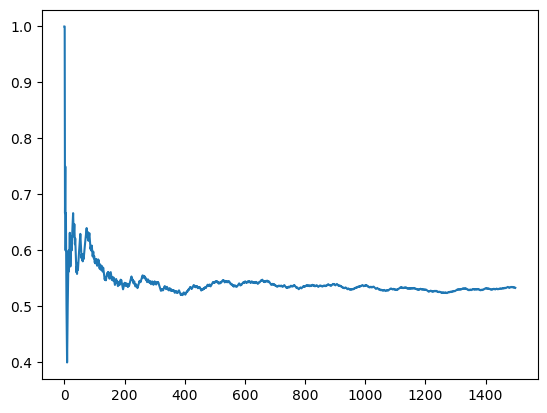

In [7]:
plt.plot(X)       # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

### La probabilidad de realizar el experimento una vez converge a:


print(np.mean(X), np.std(X))

### 6. Repita el experimento $n$ veces

### Una forma de hacerlo es mediante el siguiente código. 

In [9]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_llegada(500)
        lista.append(np.mean(s))
    return lista

In [16]:

Y=modelo(1100)

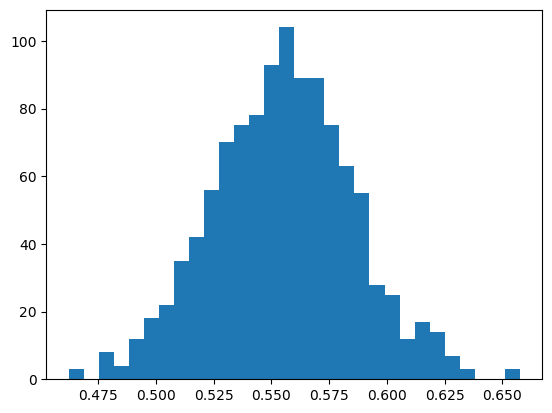

In [17]:
plt.hist(Y, bins=30)
plt.show()

### La media despúes de realizar n veces el experimento ("media de medias") es:

In [12]:
print(np.mean(Y), np.std(Y))

0.555784678229449 0.03451447710509764


7. El intervalo de confianza 

In [19]:
np.mean(Y)
y1=np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50)
y2=np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

if y1<np.mean(Y)<y2:
    print(y1, "<",np.mean(Y),"<",y2)
    print("Se acepta la hipotesis con una confiabilidad del 95%")
else:
        print("No cumple la hipótesis nula")

0.5466180560015793 < 0.5551030535916973 < 0.5635880511818153
Se acepta la hipotesis con una confiabilidad del 95%


# Solución analitica:

## Se considera un cuadrado donde los lados del cuadrado estan en los puntos (0,0),(0,30),(30,0),(30,30) entonces el área del cuadrado será de 30*30=900 ahora lo que se quiere encontrar es $|x-y| \leq 10 $ entonces tenemos que encontrar el valor de esa región sombreada y al hacerlo se observan dos trianguolos que dividen al cuadrado con base=20, altura=20 el área de los triangulos sera de $2*(\tfrac {20*20}{2})=400$ el área de la región sombreada es: $ 900-400=500 $ entonces la probabilidad es:$tfrac{región sombreada}{cuadrado}= \tfrac{500}{900}=0.55% $ de probabilidad.

# NOTA:La imagen ilustrativa del cuadrado está en mi GITHUB